In [1]:
from bs4 import BeautifulSoup as bs
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import datetime as dt

In [2]:
vendorsDF = pd.read_csv('./../data/vendorsCSVs/allVendors.csv')

In [3]:
def cleanLastSeenRegistered(s):
    s = str(s)
    if ('Registered' in s):
        return s.split('  ')[-1]
    else:
        return s

In [4]:
vendorsDF['lastSeen'] = vendorsDF['lastSeen'].apply(cleanLastSeenRegistered)

In [6]:
vendorsDF['parsingDate']  = vendorsDF['parsingDate'].apply((lambda x: dt.datetime.strptime(x, '%Y-%m-%d').date()))

In [7]:
vendorsDF = vendorsDF.drop('Unnamed: 0.1', axis=1)
vendorsDF = vendorsDF.drop('Unnamed: 0', axis=1)

In [8]:
vendorsDF

,name,rating,lastSeen,publicKey,#products,#Deals,parsingDate
0,littlegoblin,4.92,4 hours,NaN,14.0,150~200,2014-09-20
1,Rebel_Alliance,4.99,1 hours,NaN,7.0,300~500,2014-09-20
2,ThePartyDepot,5.00,16 hours,NaN,3.0,70~100,2014-09-20
3,cossacks,4.99,5 hours,NaN,7.0,300~500,2014-09-20
4,checkpoint,4.84,1 days 0 hours,NaN,31.0,55~70,2014-09-20
...,...,...,...,...,...,...,...
121153,BabyBando,5.00,3 hours,NaN,6.0,10~15,2014-10-14
121154,daydreamer33,4.94,1 days 0 hours,NaN,6.0,200~300,2014-10-14
121155,Leckermann,5.00,5 months 24 days,NaN,8.0,3~5,2014-10-14
121156,EasyRiders,NaN,20 days,NaN,5.0,0,2014-10-14


In [9]:
#vendorsDF['lastSeen'].unique()

In [10]:
def addZeroPadding(s):
    if ('Vacation' in s or 'investigation' in s):
        return s
    s ='a '+str(s)
    i =1
    while(i<10):
        looked =str(i)
        s= s.replace('a '+looked+' days','0'+looked+'D')
        s= s.replace('a '+looked+' hours','0'+looked+'H')
        s= s.replace('a '+looked+' months','0'+looked+'M')
        s= s.replace(' '+looked+' days',' 0'+looked+'D')
        s= s.replace(' '+looked+' hours',' 0'+looked+'H')
        s= s.replace(' '+looked+' months',' 0'+looked+'M')
        i+=1
    s = s.replace("a ",'')
    s = s.replace("hours",'H')
    s = s.replace("days",'D')
    s = s.replace("months",'M')
    
    s =s.strip()
    s = s.replace(' ','')
    return s


def cleanLastSeen(s):
    if ('Vacation' in s or 'investigation' in s):
        return s
    

    if ( 'D0H' in s):
        t = dt.datetime.strptime(s,"%dD0H")
        return t.day*24
    elif ( '02M29D' in s ):
        return (30*2+29)*24
    elif ( '02M30D' in s):
        return (30*2+30)*24
    elif ( '02M31D' in s):
        return (30*2+31)*24
    elif ( 'M0D' in s):
        t = dt.datetime.strptime(s,"%mM0D")
        return 30*t.month*24
    elif ( 'D' in s and 'H' in s):
        t = dt.datetime.strptime(s,"%dD%HH")
        return t.day*24 +t.hour
    elif ( 'M' in s and 'D' in s):
        t = dt.datetime.strptime(s,"%mM%dD")
        return (t.day+30*t.month)*24
    elif ( 'H' in s):
        t = dt.datetime.strptime(s,"%HH")
        return t.hour
    elif ( 'M' in s):
        t = dt.datetime.strptime(s,"%mM")
        return 30*t.month*24
    elif ( '0D' in s):
        return None
    elif ( 'D' in s):
        t = dt.datetime.strptime(s,"%dD")
        return t.day*24
    else:
        return s;


In [11]:
vendorsDF.lastSeen = vendorsDF.lastSeen.apply((lambda x:addZeroPadding(x)))


In [12]:
vendorsDF.lastSeen = vendorsDF.lastSeen.apply((lambda x:cleanLastSeen(x)))

In [13]:
vendorsDF

,name,rating,lastSeen,publicKey,#products,#Deals,parsingDate
0,littlegoblin,4.92,4,NaN,14.0,150~200,2014-09-20
1,Rebel_Alliance,4.99,1,NaN,7.0,300~500,2014-09-20
2,ThePartyDepot,5.00,16,NaN,3.0,70~100,2014-09-20
3,cossacks,4.99,5,NaN,7.0,300~500,2014-09-20
4,checkpoint,4.84,24,NaN,31.0,55~70,2014-09-20
...,...,...,...,...,...,...,...
121153,BabyBando,5.00,3,NaN,6.0,10~15,2014-10-14
121154,daydreamer33,4.94,24,NaN,6.0,200~300,2014-10-14
121155,Leckermann,5.00,4176,NaN,8.0,3~5,2014-10-14
121156,EasyRiders,NaN,None,NaN,5.0,0,2014-10-14


In [14]:
vendorsDF.lastSeen.unique()

array([4, 1, 16, 5, 24, 6, 36, 13, 0, 14, 23, 8, 21, 2472, 2, 4488, 3, 28,
       71, 11, 12, 19, 30, 20, 17, 4656, 168, 120, 9, 15, 69, 1560, 26,
       888, 192, 3432, 3264, 696, 10, 216, 55, 34, 432, 672, 4056, 3072,
       22, 4104, 96, 7, 50, 2112, 5112, 312, 61, 62, 408, 29, 47, 'nan',
       792, 360, 27, 2856, 'On Vacation Mode since 11 hours', 41, None,
       1392, 3936, 264, 59, 720, 4536, 3168, 552, 4224, 2616, 2760, 576,
       1536, 37, 4032, 5328, 48, 1128, 2712, 1272, 2568, 39, 58, 3696,
       4296, 46, 144, 18, 25, 1488, 288, 38, 54, 52, 912, 1440, 2640, 51,
       32, 2304, 53, 3744, 624, 3864, 4512, 4584, 3336, 456, 864, 1200,
       1656, 65, 45, 2400, 1104, 44, 'On Vacation Mode since 16 hours',
       2208, 33, 2160, 1344, 57, 1512, 3048, 5208, 3120, 35,
       'On Vacation Mode since 22 hours', 3912, 336, 31, 64,
       'On Vacation Mode since 17 hours', 2736, 43, 504, 4704, 5376, 56,
       3216, 960, 648, 'On Vacation Mode since 10 hours', 2136, 2448,
       3

## Cleaning done

In [20]:
nbVendorbyDate = vendorsDF[['parsingDate', 'name']].groupby(['parsingDate']).agg([ 'count'])

,name
,count
parsingDate,
2014-01-01,143
2014-01-09,166
2014-01-16,195
2014-01-26,235
2014-02-02,273
...,...
2015-06-28,823
2015-06-30,849


In [27]:
nbVendorbyDate = nbVendorbyDate.sort_values(by='parsingDate')

In [78]:
nbVendorbyDate

,name
,count
parsingDate,
2014-01-01,143
2014-01-09,166
2014-01-16,195
2014-01-26,235
2014-02-02,273
...,...
2015-06-28,823
2015-06-30,849


## #vendors

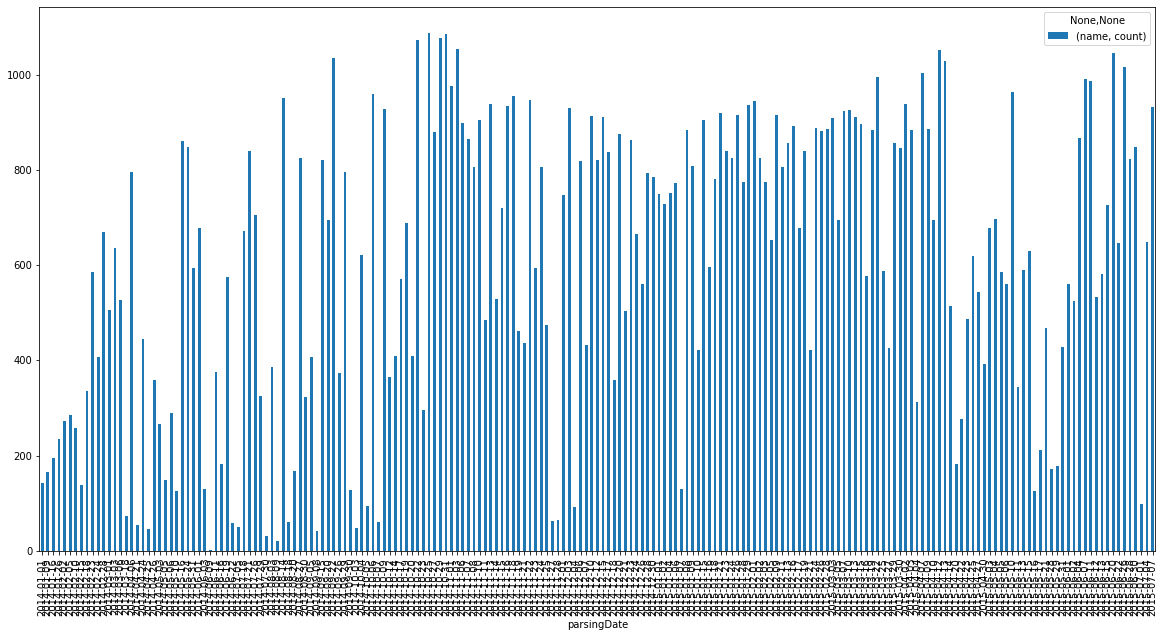

In [76]:
nbVendorbyDate.plot.bar(figsize=(20,10))

## Rating plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c3c887650>]],
      dtype=object)

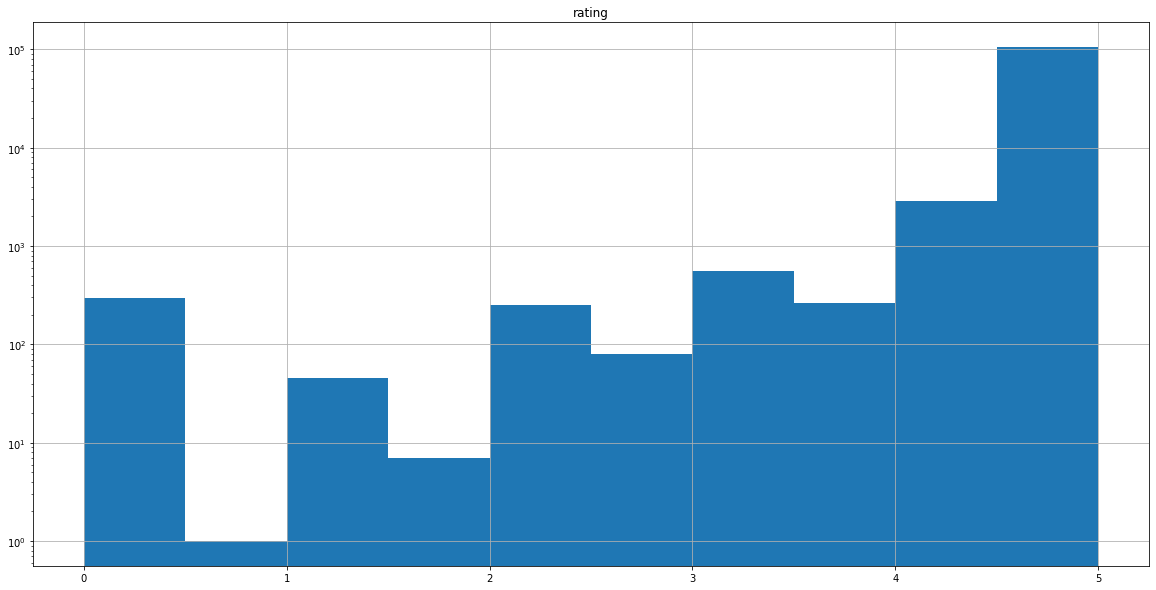

In [77]:
vendorsDF.hist(column='rating',log=True,figsize=(20,10))

## #Products plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c4139ab90>]],
      dtype=object)

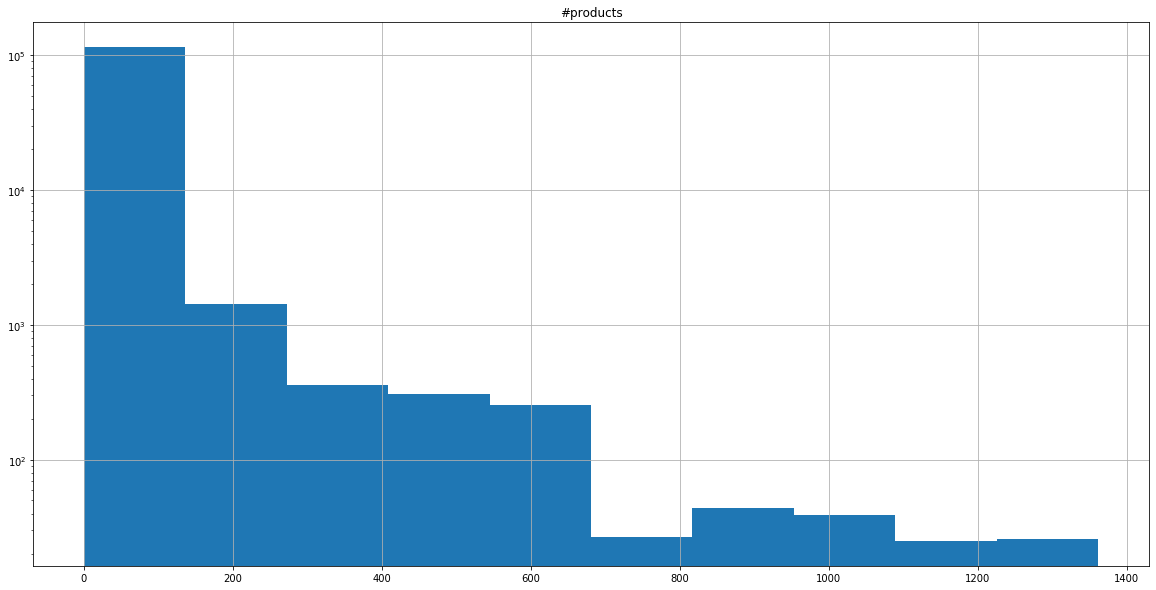

In [44]:
vendorsDF.hist(column='#products',log=True,figsize=(20,10))

# BEFORS AFTER

In [46]:
vendorsDFbefore = vendorsDF[vendorsDF.parsingDate == dt.datetime.strptime('2014-11-01', '%Y-%m-%d').date() ]
vendorsDFafter = vendorsDF[vendorsDF.parsingDate == dt.datetime.strptime('2015-01-01', '%Y-%m-%d').date() ]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c3d12f850>],
      dtype=object)

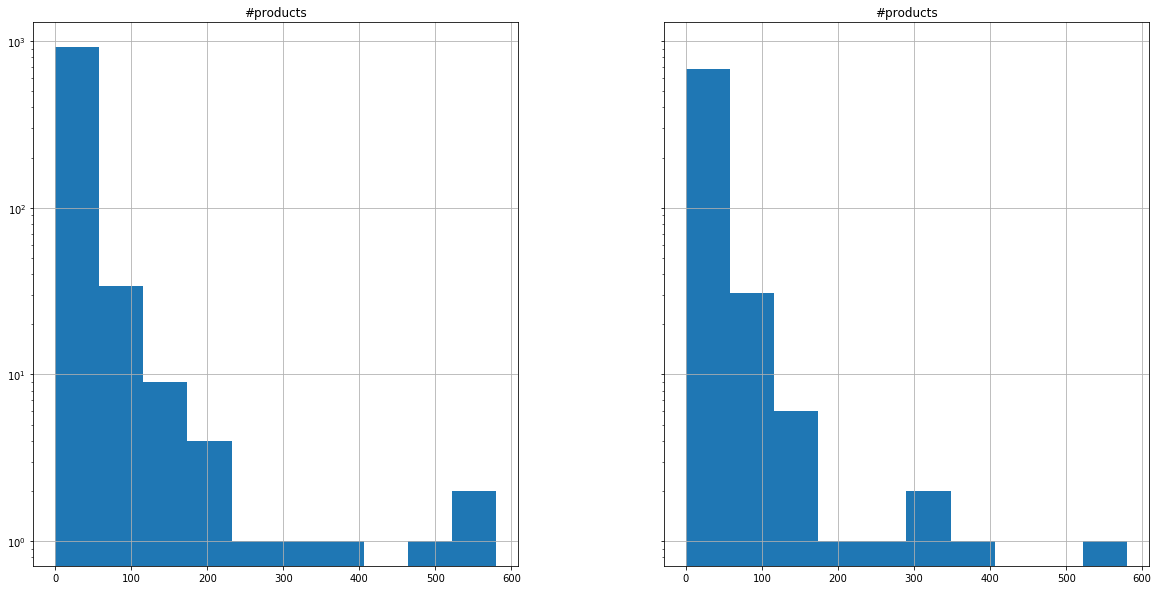

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10),sharey=True)

vendorsDFbefore.hist(column='#products',log=True ,sharey=True,ax=axes[0])
vendorsDFafter.hist(column='#products',log=True,sharey=True,ax=axes[1])

In [72]:
vendorsDFbefore.name.agg([ 'count'])

count    977
Name: name, dtype: int64

In [73]:
vendorsDFafter.name.agg([ 'count'])

count    749
Name: name, dtype: int64